# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import datasets

# Implementation

In [2]:
# Computing the Optimal Coefficients

# Coefficients
w = 0
b = 0

def fit(X, y, epochs):
    
    # global so that w, b can be used in predict()
    global w
    global b
    
    # Learning rate
    L = 0.0001

    n = float(len(X))

    # Applying Gradient Descent
    for i in range(epochs):
        # Predicted Value
        pred = w*X + b
        # Partial Derivative (w)
        Der_w = (-2/n) * sum(X*(y-pred))
        # Partial Derivative (b)
        Der_b = (-2/n) * sum(y - pred)

        # Updating coefficients
        w = w - L * Der_w
        b = b - L * Der_b

    print(w, b)
    
def predict(X):
    return w * X + b

# Testing
Started off with using a small data set.

In [3]:
X = [4.9, 6.0, 5.5, 5.2, 4.7, 5.0, 5.8]
Y = [56, 77, 70, 67, 58, 61, 72]

data = pd.DataFrame(list(zip(X, Y)), columns =['X', 'Y']) 

X = data.iloc[:, 0]
Y = data.iloc[:, 1]

11.995554871194832 2.2216488818556286


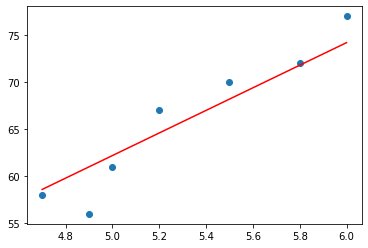

In [4]:
fit(X, Y, 1000)
pred = predict(X)
plt.scatter(X,Y)
plt.plot([min(X), max(X)], [min(pred), max(pred)], color='red') 

### Using the diabetes data set from scikit-learn for testing.

In [6]:
diabetes_data = datasets.load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes['target'] = pd.Series(diabetes_data.target)

df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


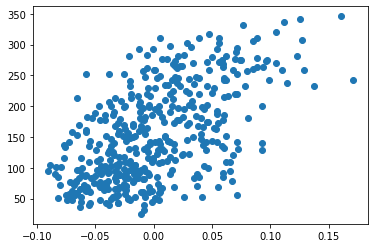

In [7]:
plt.scatter(df_diabetes["bmi"], df_diabetes['target'])

In [8]:
fit(df_diabetes["bmi"], df_diabetes["target"], 50000)

32.96648054471191 152.12668497959527


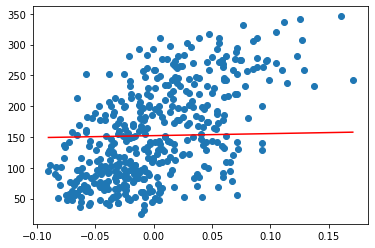

In [9]:
pred = predict(df_diabetes["bmi"])
plt.scatter(df_diabetes["bmi"],df_diabetes["target"])
plt.plot([min(df_diabetes["bmi"]), max(df_diabetes["bmi"])], [min(pred), max(pred)], color='red') 

# Notes
I believe that the fit for the diabetes set is skewed due to the cluster towards the lower side of the data. However, I also believe that this could be avoided by optimizing the hyperparameters (learning rate and number of epochs). 

It would also be beneficial to split the data, similar to the train_test_split function from sci-kit learn, in order to get train, test, and validation splits. Then the model could be tested against the validation set every epoch. The model would continue to be trained as long as the error against the validation set continues to decrease.